In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup complete")

Setup complete


In [2]:
# lendo os dados do arquivo bruto que virá do cartãoSD do satélite
data_path = './brute_data/launch_telemetry.json'
telemetry_data = pd.read_json(data_path, convert_dates=True)

In [3]:
# mostrando os dados
telemetry_data

,giroscopio,acelerometro,equipe,pressao,payload,bateria,temperatura
0,"[0.0, 0.0, 0.0]","[0.11, 0.05, -1.09]",33,73566.17,"{'umidade': 56.22, 'altitude': 0.1463819999999...",50,27.07
1,"[0.0, 0.0, 0.0]","[0.2, -0.01, -1.05]",33,73566.17,"{'umidade': 45.64, 'altitude': 54.51381, 'ECO2...",50,27.07
2,"[-3.11, 0.5, -29.42]","[0.21, 0.01, -1.03]",33,80671.09,"{'umidade': 35.74, 'altitude': 186.033, 'ECO2'...",50,26.26
3,"[7.63, -9.48, -55.57]","[0.19, -0.0, -1.04]",33,68460.99,"{'umidade': 18.14, 'altitude': 316.6707, 'ECO2...",50,21.07
4,"[8.23, -1.38, -47.96]","[0.2, 0.02, -1.02]",33,58870.29,"{'umidade': 17.36, 'altitude': 433.2344, 'ECO2...",50,16.11
...,...,...,...,...,...,...,...
59,"[-5.76, 1.49, 0.39]","[-1.0, -0.0, -0.02]",33,100232.60,"{'umidade': 43.46, 'altitude': 5.578369, 'ECO2...",50,37.27
60,"[-5.79, 1.34, 0.42]","[-1.0, -0.0, -0.01]",33,100238.20,"{'umidade': 43.24, 'altitude': 5.549039, 'ECO2...",50,36.53
61,"[-5.85, 1.46, 0.54]","[-1.0, 0.0, -0.02]",33,100245.30,"{'umidade': 43.91, 'altitude': 5.5136330000000...",50,36.59
62,"[-6.02, 0.37, -0.02]","[0.44, 0.14, -0.9500000000000001]",33,100248.60,"{'umidade': 43.06, 'altitude': 5.464222, 'ECO2...",50,36.09


In [4]:
# calcula a média dos valores dos gases poluentes
sum_tvoc = 0
sum_eco2 = 0

for index, row in telemetry_data.iterrows():
    sum_tvoc += row['payload']['TVOC']
    sum_eco2 += row['payload']['ECO2']

num_rows = len(telemetry_data)
average_tvoc = round(sum_tvoc / num_rows, 2)
average_eco2 = round(sum_eco2 / num_rows, 2)

print(f"média TVOC: {average_tvoc}")
print(f"média ECO2: {average_eco2}")

média TVOC: 29.19
média ECO2: 206.3


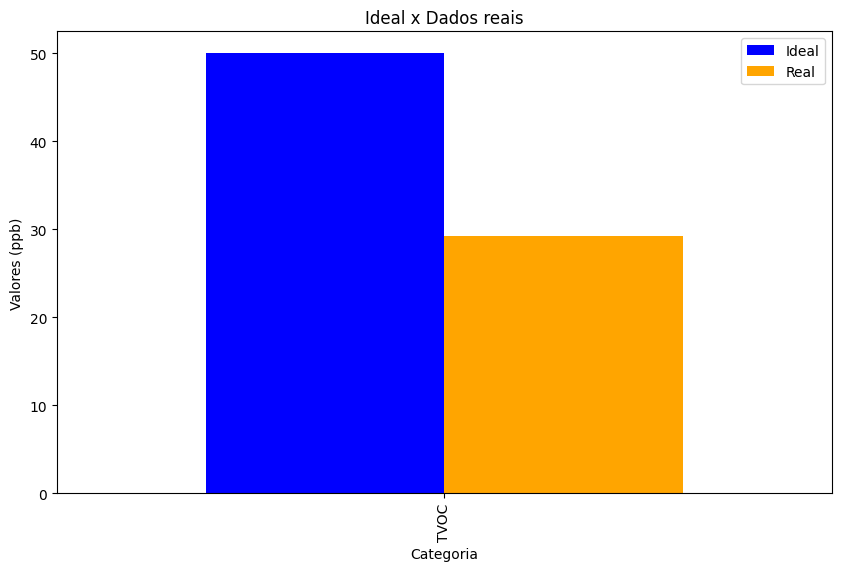

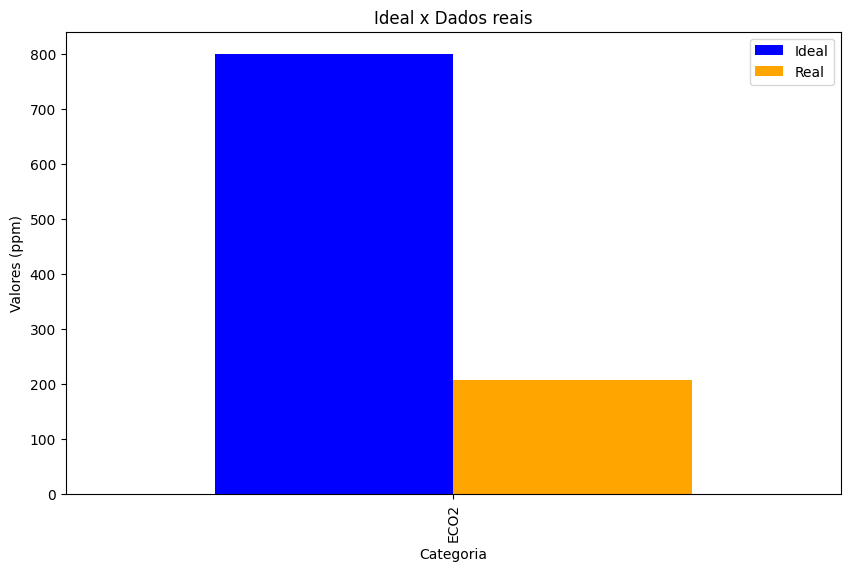

In [12]:
cor_esperado = 'blue'
cor_real = 'orange'

categorias = ( #categoria / valor esperado / valor real / unidade de media
    ["TVOC", 50, average_tvoc, "ppb"],
    ["ECO2", 800, average_eco2, "ppm"]
)

for item in categorias:
    # Cria um DataFrame com os dados
    average_data = pd.DataFrame({
        'Categoria': [item[0]],
        'Esperado': [item[1]],
        'Real': [item[2]]
    })
    
    # Seta a coluna 'Categoria' como index
    average_data.set_index('Categoria', inplace=True)
    
    # Plota o gráfico de barras
    ax = average_data.plot(kind='bar', color=[cor_esperado, cor_real], width=0.8, figsize=(10, 6))
    
    # Adiciona os labels e o título
    #plt.xlabel('Gases')
    plt.ylabel(f'Valores ({item[3]})')
    plt.title('Ideal x Dados reais')
    # Adicionando a legenda
    ax.legend(['Ideal', 'Real'])
    
    # Mostra o gráfico
    plt.show()

    Valor               Tempo
0       0 1970-01-01 00:04:06
1       0 1970-01-01 00:04:08
2      24 1970-01-01 00:08:12
3     332 1970-01-01 00:12:16
4     310 1970-01-01 00:16:20
..    ...                 ...
59     62 1970-01-01 04:00:00
60     25 1970-01-01 04:04:04
61     36 1970-01-01 04:08:08
62     17 1970-01-01 04:12:12
63    112 1970-01-01 04:16:16

[64 rows x 2 columns]


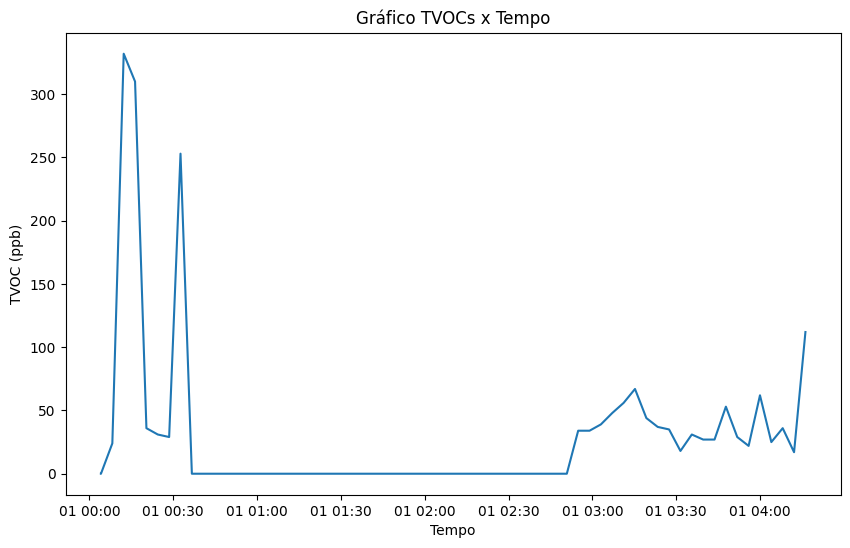

In [6]:
data = {
    'Valor': [],
    'Tempo': []
}

for item in telemetry_data['payload']:
    data['Valor'].append(item['TVOC'])
    data['Tempo'].append(pd.to_datetime(item['time'], unit='s'))

df_payload = pd.DataFrame(data)
print(df_payload)

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(df_payload['Tempo'], df_payload['Valor'], marker='o', linestyle='-') # com ponto
plt.plot(df_payload['Tempo'], df_payload['Valor'], linestyle='-')

# Adding labels and title
plt.xlabel('Tempo')
plt.ylabel('TVOC (ppb)')
plt.title('Gráfico TVOCs x Tempo')

# Display the plot
plt.show()

    Valor               Tempo
0       0 1970-01-01 00:04:06
1       0 1970-01-01 00:04:08
2     400 1970-01-01 00:08:12
3     812 1970-01-01 00:12:16
4     804 1970-01-01 00:16:20
..    ...                 ...
59    481 1970-01-01 04:00:00
60    402 1970-01-01 04:04:04
61    427 1970-01-01 04:08:08
62    400 1970-01-01 04:12:12
63    568 1970-01-01 04:16:16

[64 rows x 2 columns]


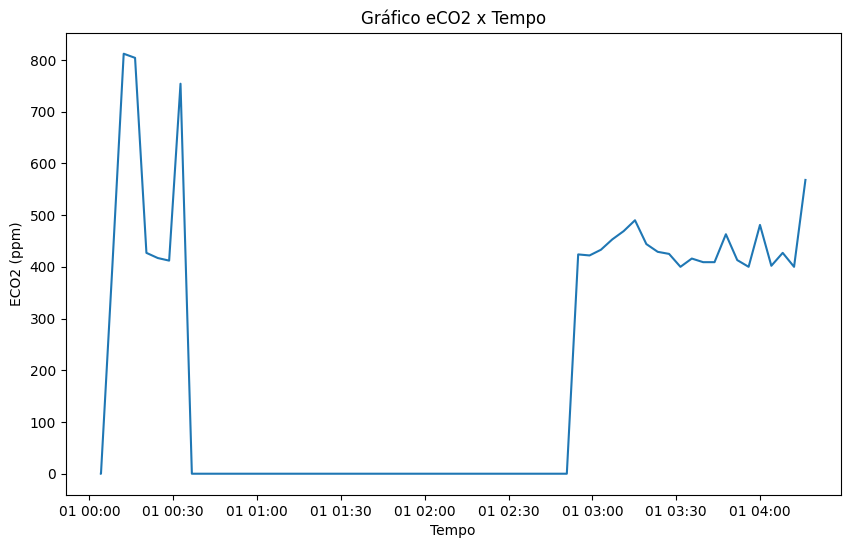

,Valor,Tempo
0,0,1970-01-01 00:04:06
1,0,1970-01-01 00:04:08
2,400,1970-01-01 00:08:12
3,812,1970-01-01 00:12:16
4,804,1970-01-01 00:16:20
...,...,...
59,481,1970-01-01 04:00:00
60,402,1970-01-01 04:04:04
61,427,1970-01-01 04:08:08
62,400,1970-01-01 04:12:12


In [7]:
data = {
    'Valor': [],
    'Tempo': []
}

for item in telemetry_data['payload']:
    data['Valor'].append(item['ECO2'])
    data['Tempo'].append(pd.to_datetime(item['time'], unit='s'))

df_payload = pd.DataFrame(data)
print(df_payload)

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(df_payload['Tempo'], df_payload['Valor'], marker='o', linestyle='-') # com ponto
plt.plot(df_payload['Tempo'], df_payload['Valor'], linestyle='-')

# Adding labels and title
plt.xlabel('Tempo')
plt.ylabel('ECO2 (ppm)')
plt.title('Gráfico eCO2 x Tempo')

# Display the plot
plt.show()
df_payload

    Valor               Tempo
0   27.07 1970-01-01 00:04:06
1   27.07 1970-01-01 00:04:08
2   26.26 1970-01-01 00:08:12
3   21.07 1970-01-01 00:12:16
4   16.11 1970-01-01 00:16:20
..    ...                 ...
59  37.27 1970-01-01 04:00:00
60  36.53 1970-01-01 04:04:04
61  36.59 1970-01-01 04:08:08
62  36.09 1970-01-01 04:12:12
63  36.61 1970-01-01 04:16:16

[64 rows x 2 columns]


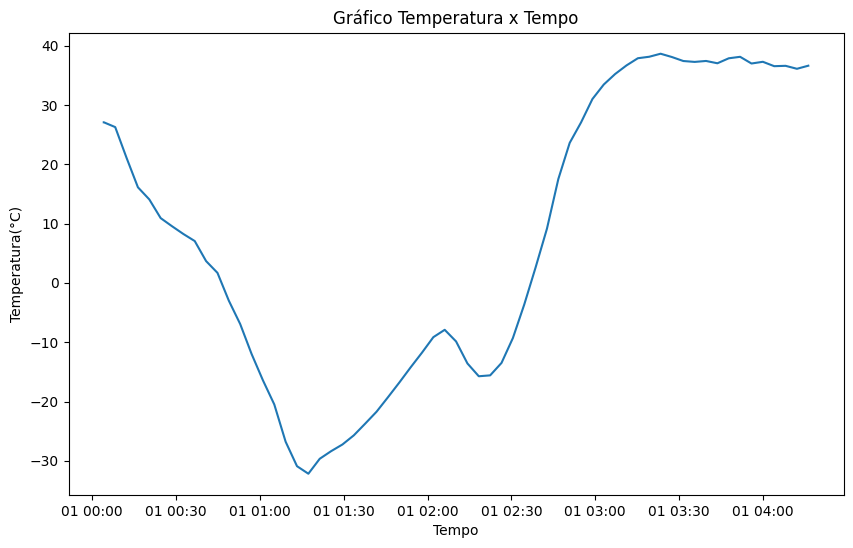

    Valor               Tempo
0   56.22 1970-01-01 00:04:06
1   45.64 1970-01-01 00:04:08
2   35.74 1970-01-01 00:08:12
3   18.14 1970-01-01 00:12:16
4   17.36 1970-01-01 00:16:20
..    ...                 ...
59  43.46 1970-01-01 04:00:00
60  43.24 1970-01-01 04:04:04
61  43.91 1970-01-01 04:08:08
62  43.06 1970-01-01 04:12:12
63  43.49 1970-01-01 04:16:16

[64 rows x 2 columns]


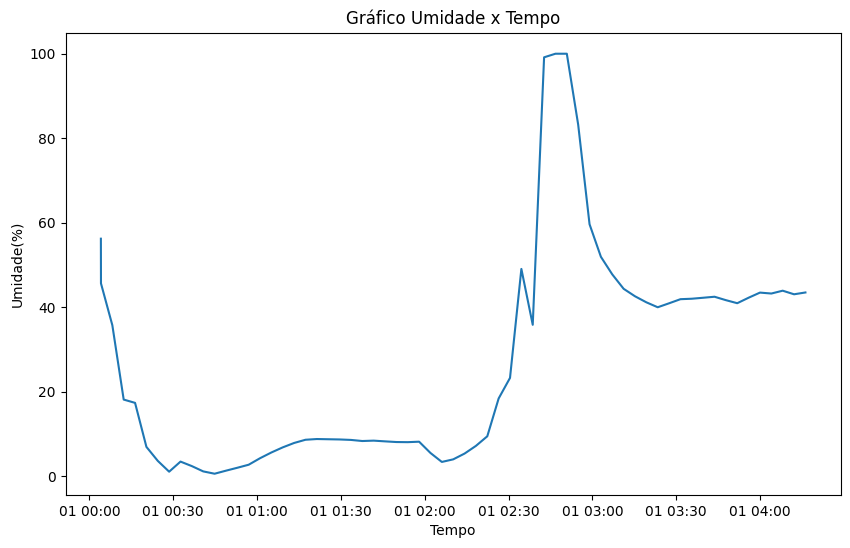

    Valor               Tempo
0      50 1970-01-01 00:04:06
1      50 1970-01-01 00:04:08
2      50 1970-01-01 00:08:12
3      50 1970-01-01 00:12:16
4      50 1970-01-01 00:16:20
..    ...                 ...
59     50 1970-01-01 04:00:00
60     50 1970-01-01 04:04:04
61     50 1970-01-01 04:08:08
62     50 1970-01-01 04:12:12
63     50 1970-01-01 04:16:16

[64 rows x 2 columns]


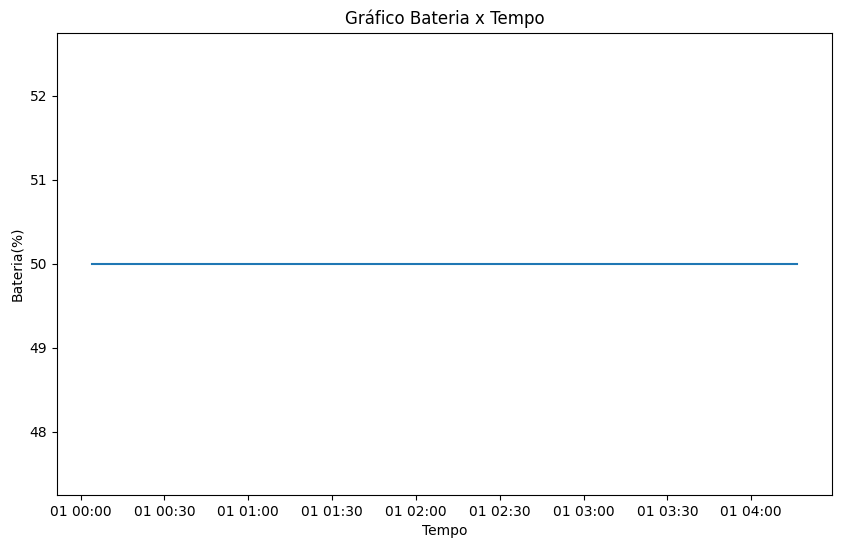

        Valor               Tempo
0    73566.17 1970-01-01 00:04:06
1    73566.17 1970-01-01 00:04:08
2    80671.09 1970-01-01 00:08:12
3    68460.99 1970-01-01 00:12:16
4    58870.29 1970-01-01 00:16:20
..        ...                 ...
59  100232.60 1970-01-01 04:00:00
60  100238.20 1970-01-01 04:04:04
61  100245.30 1970-01-01 04:08:08
62  100248.60 1970-01-01 04:12:12
63  100229.30 1970-01-01 04:16:16

[64 rows x 2 columns]


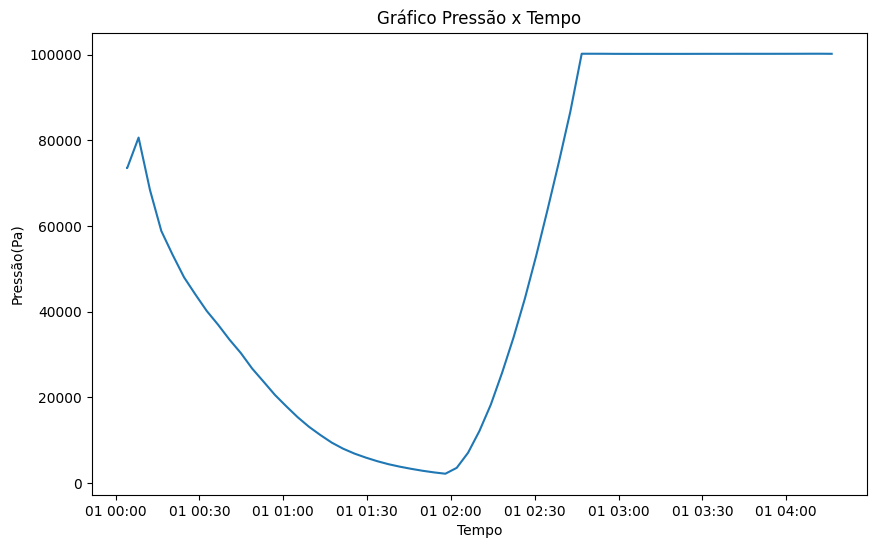

In [8]:
items = [
    {'title': "Gráfico Temperatura x Tempo", 'key': "temperatura", 'ylabel': "Temperatura(°C)"},
    {'title': "Gráfico Umidade x Tempo", 'key': "umidade", 'ylabel': "Umidade(%)"},
    {'title': "Gráfico Bateria x Tempo", 'key': "bateria", 'ylabel': "Bateria(%)"},
    {'title': "Gráfico Pressão x Tempo", 'key': "pressao", 'ylabel': "Pressão(Pa)"},
]

for item in items:
    data = {
        'Valor': [],
        'Tempo': []
    }

    for index, row in telemetry_data.iterrows():
        try:
            data['Valor'].append(row[item['key']])
        except KeyError:
            data['Valor'].append(row['payload'][item['key']])
        data['Tempo'].append(pd.to_datetime(row['payload']['time'], unit='s'))
    
    df_payload = pd.DataFrame(data)
    print(df_payload)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    #plt.plot(df_payload['Tempo'], df_payload['Valor'], marker='o', linestyle='-') # com ponto
    plt.plot(df_payload['Tempo'], df_payload['Valor'], linestyle='-')
    
    # Adding labels and title
    plt.xlabel('Tempo')
    plt.ylabel(item['ylabel'])
    plt.title(item['title'])
    
    # Display the plot
    plt.show()